In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()

x = iris.data
y = iris.target
names = list(iris.target_names)


Text(0, 0.5, 'largeur sépal')

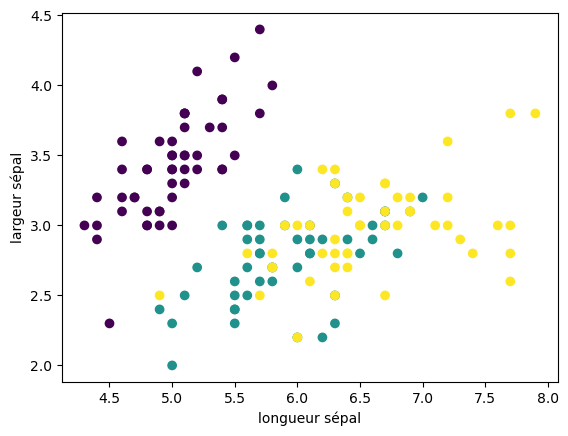

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('longueur sépal')
plt.ylabel('largeur sépal')

In [73]:
from mpl_toolkits.mplot3d import Axes3D

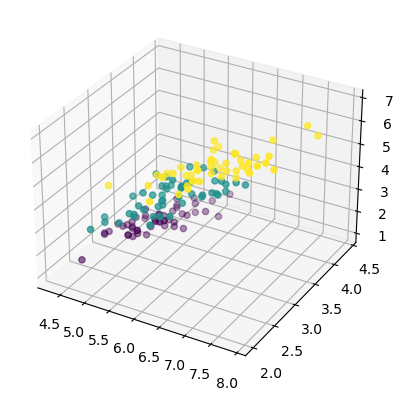

In [78]:
ax = plt.axes(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:,2], c=y)

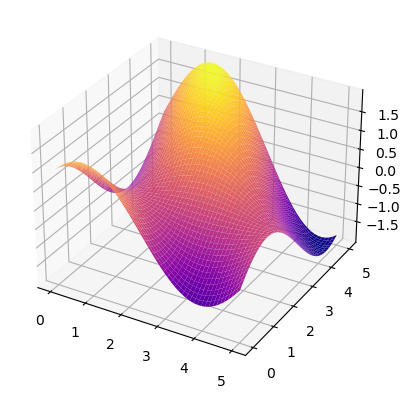

In [79]:
f = lambda x, y: np.sin(x) + np.cos(x+y)

X = np.linspace(0, 5, 50)
Y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
plt.show()

Interpolation

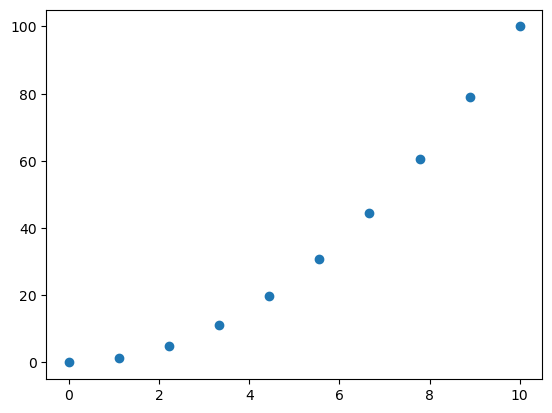

In [28]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [16]:
from scipy.interpolate import interp1d

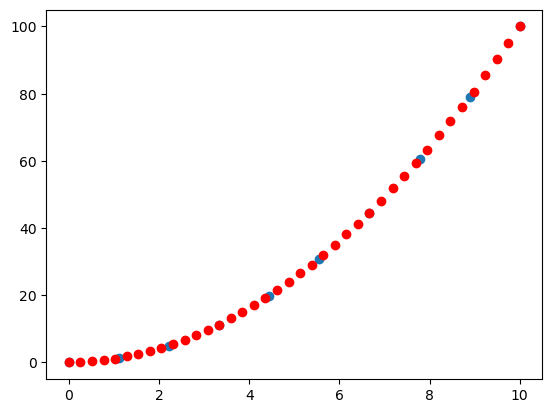

In [53]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 40)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

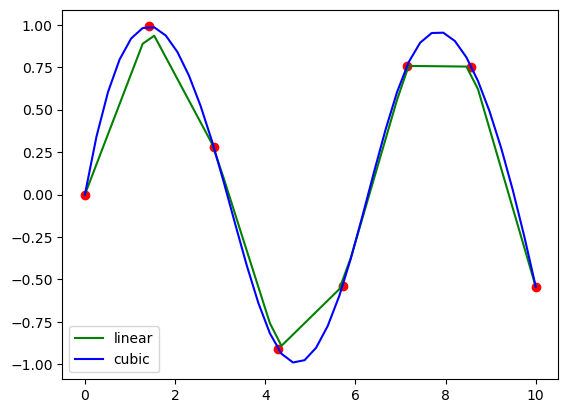

In [55]:
x2 = np.linspace(0, 10, 8)
y2 = np.sin(x2)


f2 = interp1d(x2, y2, kind='linear')
f3 = interp1d(x2, y2, kind='cubic')

result = f2(new_x)
result2 = f3(new_x)

plt.scatter(x2, y2, c='red')
plt.plot(new_x, result, c='green', label='Linear')
plt.plot(new_x, result2, c='blue', label='Cubic')
plt.legend()

Optimize

In [56]:
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [57]:
from scipy import optimize

In [ ]:
optimize.curve_fit(func, x, y)

Traitement du signal

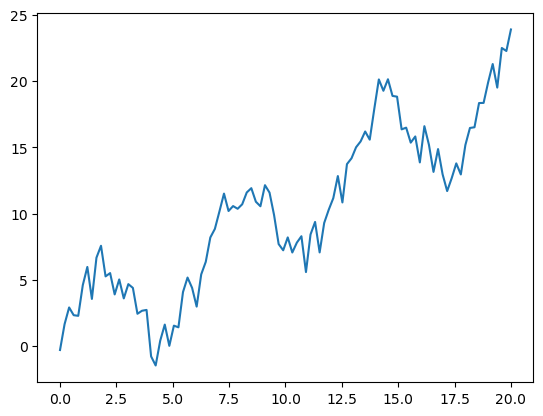

In [59]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [60]:
from scipy import signal

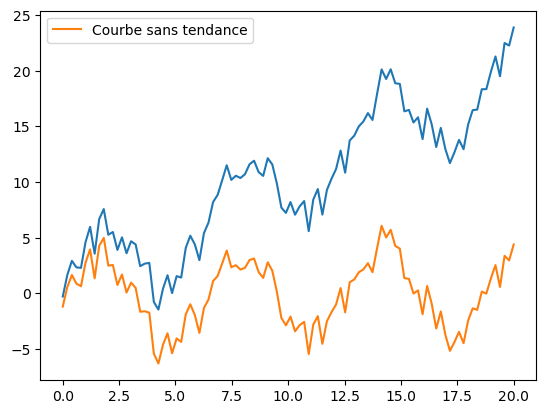

In [62]:
new_y = signal.detrend(y)
plt.plot(x, y)
plt.plot(x, new_y, label='Courbe sans tendance')
plt.legend()

Transformation de Fourier

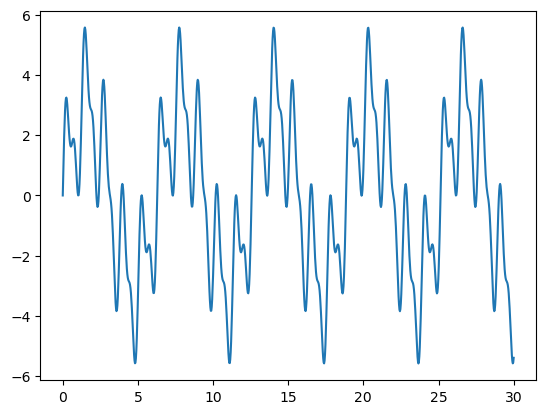

In [63]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [64]:
from scipy import fftpack

C:\Users\USER\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


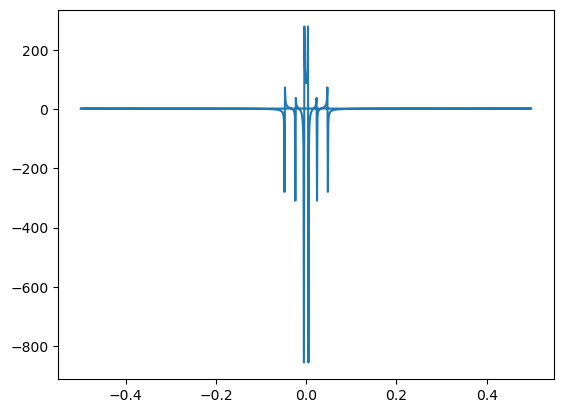

In [65]:
fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)
plt.plot(frequences, fourier)

Spectre

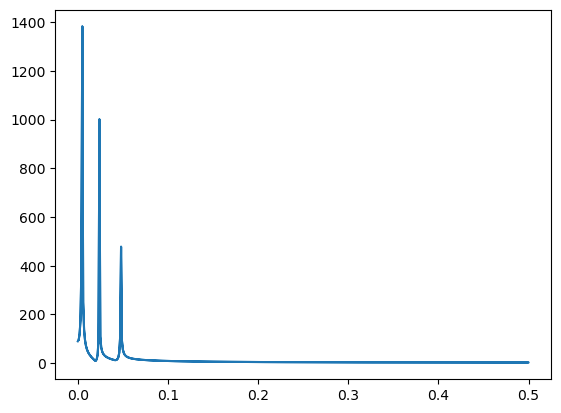

In [66]:
fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)

#on ajoute ces deux lignes cel nous permet de retirer les amplitudes et frequences negatives
power = np.abs(fourier)
abs_frequences = np.abs(frequences)

#on change nos variables
plt.plot(abs_frequences, power)

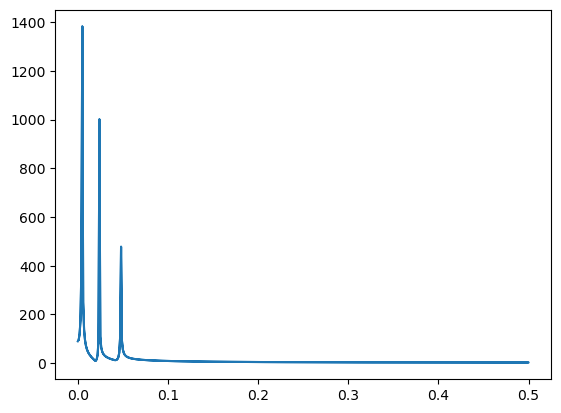

In [67]:
fourier[power<400] = 0
plt.plot(abs_frequences, power)

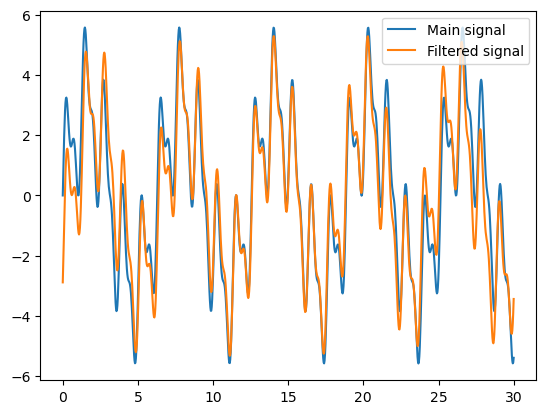

In [71]:
#Transfo de fourier inverse
filtered_signal = fftpack.ifft(fourier)

plt.plot(x, y, label='Main signal')
plt.plot(x, filtered_signal, label='Filtered signal')
plt.legend()

Morphology (ndimage)